# Latin Hypercube Sampling

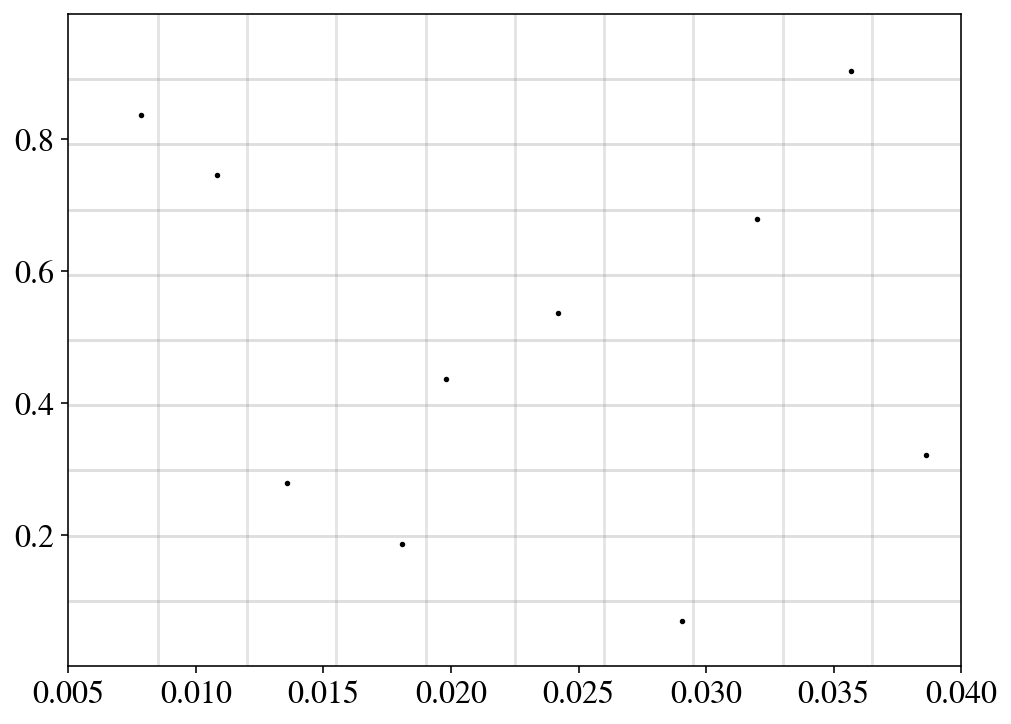

In [3]:
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

N = 10
D = 2

sampler = qmc.LatinHypercube(d=D)
sample = sampler.random(n=N)

ranges = [[ 0.005, 0.04], [ 0.001,0.99]]

for i,r in enumerate(ranges):
    sample.T[i]*=(r[1]-r[0])
    sample.T[i]+=r[0]

fig,ax = plt.subplots()
ax.scatter(sample[:,0], sample[:, 1], color="black", s=3)
for i in np.arange(1,N):
    ax.axhline(i*(ranges[1][1] - ranges[1][0])/N + ranges[1][0], color="grey", alpha=0.25)
    ax.axvline(i*(ranges[0][1] - ranges[0][0])/N + ranges[0][0], color="grey", alpha=0.2)
ax.set_xlim(ranges[0])
ax.set_ylim(ranges[1])
plt.show()

In [4]:
arr1 = np.random.random(10)
arr2 = np.random.random(10)
print(arr1)
print(arr2)
f = open("test.txt", "ba")
np.savetxt(f, arr1[np.newaxis])
np.savetxt(f, arr2[np.newaxis])
f.close()

[0.15750671 0.46218761 0.11017123 0.72961642 0.46348527 0.45014211
 0.70640005 0.43172429 0.65611414 0.883324  ]
[0.59366798 0.28681373 0.55007319 0.04998389 0.92971177 0.18603209
 0.68387963 0.43732914 0.09191902 0.47549307]


[[3.44499085e-02 8.61097839e-01 4.99622067e+01 1.67184527e+00
  9.04820926e-01 1.47922456e-01]
 [2.55323590e-02 8.40163736e-01 8.73297964e+01 2.29490461e+00
  8.48616147e-01 9.64890317e-02]
 [2.22347171e-02 2.13508816e-01 4.02425375e+01 2.38745980e+00
  8.62952096e-01 4.67673149e-01]
 [3.65143228e-02 8.87446590e-01 8.06684331e+01 4.94596597e+00
  1.06691025e+00 2.37950759e-01]
 [2.58289027e-02 7.82542788e-01 8.35345853e+01 4.17592974e+00
  1.25638098e+00 2.24381350e-01]
 [3.09487545e-02 1.66685719e-01 7.79152521e+01 3.68908490e+00
  8.15712289e-01 3.24680282e-01]
 [1.26379706e-02 7.38912020e-01 4.67622627e+01 2.97529264e+00
  1.06547339e+00 3.05787755e-02]
 [3.47520906e-02 7.23940259e-02 7.41086789e+01 1.69737290e+00
  1.12073483e+00 2.54214163e-01]
 [2.18361196e-02 4.69950965e-01 7.19758691e+01 2.39948060e+00
  1.08058584e+00 6.66749379e-02]
 [9.21971278e-03 1.88089394e-02 6.74926958e+01 4.38898595e+00
  1.18501979e+00 5.24420992e-01]
 [3.86570697e-02 4.58337370e-01 6.79852371e+01 4.5

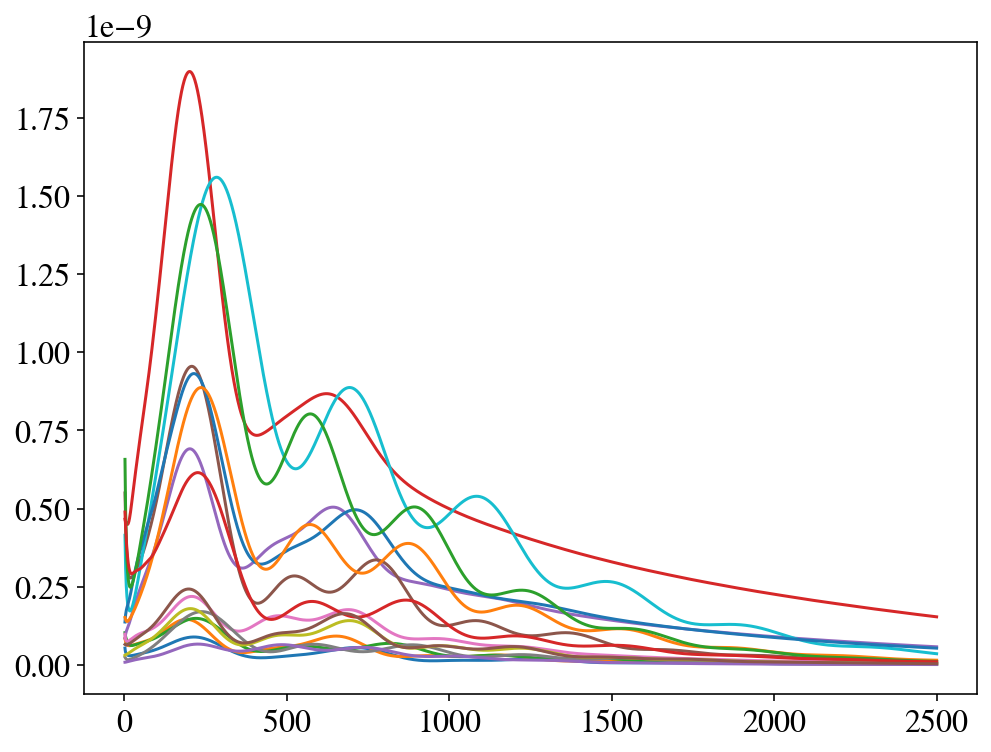

In [17]:
model3 = np.loadtxt("../src/models_rank2.txt")
tt3 = np.loadtxt("../src/tt_rank2.txt")

print(model3)
ell = np.arange(2, 2501)

fig,ax = plt.subplots()
for tt in tt3:
    ax.plot(ell, ell*(ell+1)/(2*np.pi)*tt)
#ax.set_yscale('log')

2.4983978970976315
0.9236817800927001
1.515818923951576
Fraction inside is 675/1000 = 0.675


/var/folders/dx/56r119096g71nr7d270292b80000gn/T/ipykernel_54731/1807851413.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  sample = np.random.multivariate_normal(mean, cov, size=N)


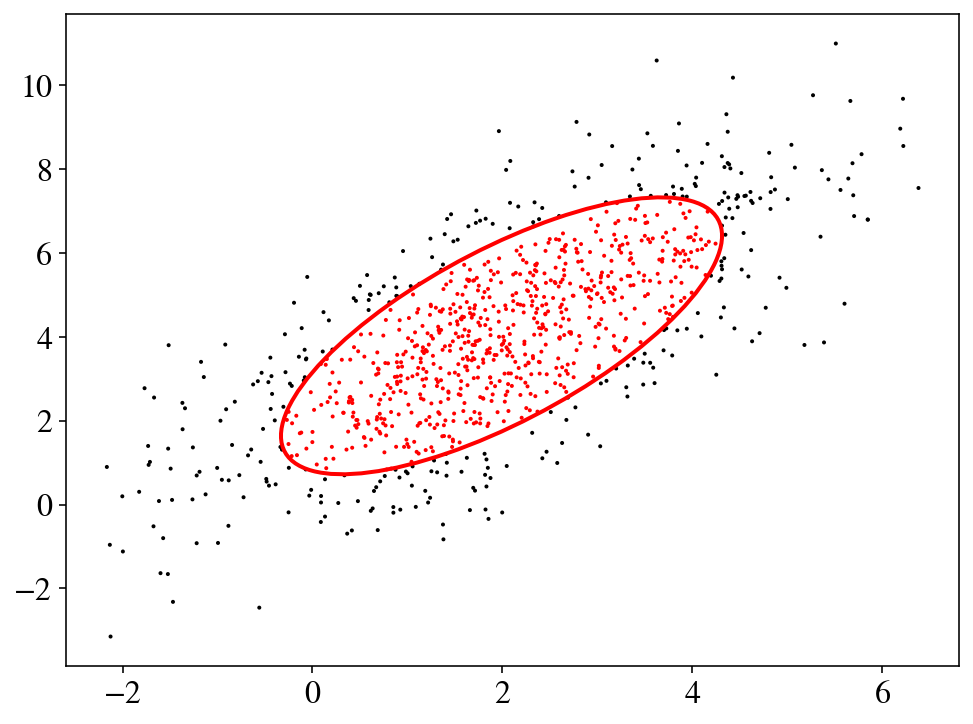

In [89]:
import numpy as np
import scipy

N = 1000

mean = [2, 4]
cov = [[1, 3], 
       [3, 4]]

sample = np.random.multivariate_normal(mean, cov, size=N)
## parameter order will be x,y

def ellipse_2d(mu, f, cl = 0.683):
    sigx2 = f[0,0]
    sigy2 = f[1,1]
    cross = f[0,1]
    a = np.sqrt((sigx2 + sigy2)/2. + np.sqrt((sigx2 - sigy2)**2/4. + cross**2))
    b = np.sqrt((sigx2 + sigy2)/2. - np.sqrt((sigx2 - sigy2)**2/4. + cross**2))
    print(a)
    print(b)
    theta=0.5*np.arctan2(2*cross,sigx2-sigy2)*180./(np.pi)
    alpha=np.sqrt(scipy.special.chdtri(2,1-cl))
    print(alpha)
    return matplotlib.patches.Ellipse((mu[0], mu[1]), alpha*2*a, alpha*2*b,
                     angle=theta, linewidth=2, fill=False, zorder=2, color="red")

def points_inside(ellipse, points):
    theta_rad = -ellipse.angle*np.pi/180.
    xc = points[:,0] - ellipse.get_center()[0]
    yc = points[:,1] - ellipse.get_center()[1]

    xct = xc * np.cos(theta_rad) - yc * np.sin(theta_rad)
    yct = xc * np.sin(theta_rad) + yc * np.cos(theta_rad)

    rad_cc = (xct**2/(ellipse.width/2.)**2) + (yct**2/(ellipse.height/2.)**2)
    total = (rad_cc <= 1).sum()
    inside_array = np.where(rad_cc <= 1.)[0]

    return total, inside_array



mu_sample = np.mean(sample, axis=0)
cov_sample = np.cov(sample.T)

e1 = ellipse_2d(mu_sample, cov_sample)

num, in_array = points_inside(e1, sample)

print("Fraction inside is {}/{} = {}".format(num, N, 1.*num/N))

color_array = np.array(['black'] * sample.shape[0])
color_array[in_array] = "red"

fig,ax=plt.subplots()
ax.scatter(sample[:,0], sample[:,1], c=color_array, s = 1)
ax.add_patch(e1)
plt.show()

In [90]:
fisher = np.linalg.pinv(cov_sample)
w,v = np.linalg.eigh(cov_sample)
print(v)
x = np.linspace(-3, 7, 1000)

[[-0.85026829  0.52634953]
 [ 0.52634953  0.85026829]]


2.4983978970976315
0.9236817800927001
1.515818923951576
Fraction inside is 675/1000 = 0.675


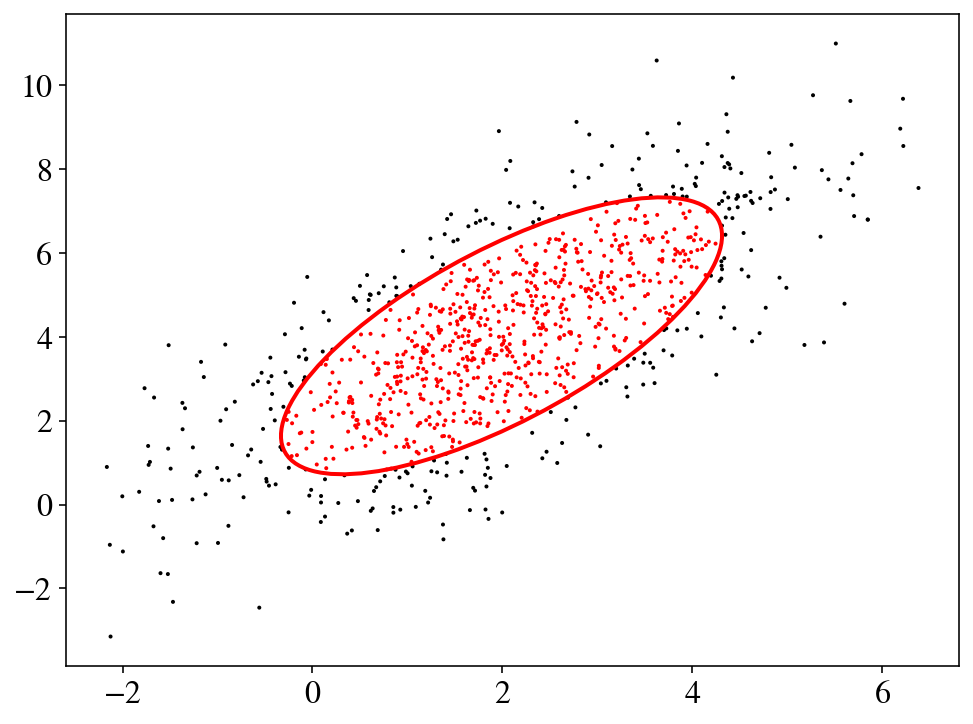

In [94]:
e1 = ellipse_2d(mu_sample, cov_sample)
num, in_array = points_inside(e1, sample)
print("Fraction inside is {}/{} = {}".format(num, N, 1.*num/N))
color_array = np.array(['black'] * sample.shape[0])
color_array[in_array] = "red"
fig,ax=plt.subplots()
ax.scatter(sample[:,0], sample[:,1], c=color_array, s = 1)
ax.add_patch(e1)
ax.
plt.show()

In [96]:
sys.path.insert(0, '/Users/gabe/projects/recombination/src')
from RecTools import *

ln10e10As = 3.047

As = np.exp(ln10e10As)/(10**10)
theta_s_100 = 1.04101

cosmo_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "ln10^{10}A_s": ln10e10As,
    "H0": 67.66
}

noise_parameters = {'beam_FWHM_143_arcmin' : 7.3,
                        'beam_FWHM_217_arcmin' : 4.90,
                        'weight_inv_T_143' : 0.36e-4,
                        'weight_inv_P_143' : 1.61e-4,
                        'weight_inv_T_217' : 0.78e-4,
                        'weight_inv_P_217' : 3.25e-4,
                        'fsky' : 0.8,
                        'use_143' : True,
                        'use_217' : True
                        }  

num_control_points = 4
free_pivots = np.linspace(start=np.floor(fiducial_thermo['z'][ind_lowz]), stop=np.floor(fiducial_thermo['z'][ind_highz]), num=num_control_points)
dz_pivot = np.diff(free_pivots)[0]
zmin_pert = free_pivots[0] - dz_pivot
zmax_pert = free_pivots[-1] + dz_pivot

print(zmin_pert)

pivots = np.insert(free_pivots, 0, zmin_pert)
pivots = np.append(pivots, zmax_pert)

str_pivots = ["{:.4f}".format(p) for p in pivots]
str_pivots = ",".join(str_pivots)
print(str_pivots)


target_params = [*cosmo_params.keys(), "xe_control_points"]

In [100]:
n = 6 

x = np.arange(1, -1)

for i in x:
    print("here")

In [166]:
arr = np.array(["foo", "bar", "baz", "lorem", "ipsum", "coolio"])
keep = ["bar", "foo", "lorem"]
indices_to_keep = np.where(np.isin(arr, keep))[0]
print(indices_to_keep)
sub_arr = arr[indices_to_keep]

sorted_ind = [int(np.where(sub_arr==n)[0]) for n in keep]
print(sorted_ind)
print(sub_arr)
print(sub_arr[sorted_ind])


print(indices_to_keep)


[0 1 3]
[1, 0, 2]
['foo' 'bar' 'lorem']
['bar' 'foo' 'lorem']
[0 1 3]


In [149]:
np.random.seed(0)
matrix = np.random.rand(6,6)
matrix = (matrix + matrix.T)/2.0
print(matrix)
marginalized = matrix[indices_to_keep, :][:, indices_to_keep]
print(marginalized)
marginalized = marginalized[[2, 1,0],:][:, [2,1,0]]
print(marginalized)


[[0.5488135  0.57638829 0.58540397 0.66151997 0.27096461 0.45522486]
 [0.57638829 0.891773   0.9446297  0.62672683 0.71582303 0.6515643 ]
 [0.58540397 0.9446297  0.07103606 0.53287382 0.08178584 0.64438509]
 [0.66151997 0.62672683 0.53287382 0.79915856 0.70307414 0.67448156]
 [0.27096461 0.71582303 0.08178584 0.70307414 0.52184832 0.21672587]
 [0.45522486 0.6515643  0.64438509 0.67448156 0.21672587 0.6176355 ]]
[[0.5488135  0.57638829 0.66151997]
 [0.57638829 0.891773   0.62672683]
 [0.66151997 0.62672683 0.79915856]]
[[0.79915856 0.62672683 0.66151997]
 [0.62672683 0.891773   0.57638829]
 [0.66151997 0.57638829 0.5488135 ]]


['coo1' 'coo2']
